Working with Linear Models
=======================================================

## Evaluating the linear regression model}
* In this section, we'll look at how well our regression fits the underlying data. We fit a regression
* in the last section, but didn't pay much attention to how well we actually did it. 
* The first question
after we fit the model was clearly "\textit{How well does the model fit?}" Here we will examine
this question.

### Getting ready 
* Let's use the <tt>lr</tt>tt> object and boston dataset—reach back into your code from the \textit{Fitting a line
through data} section. 
* The lr object will have a lot of useful methods now that the model has
been fit.

#### Implementation
There are some very simple metrics and plots we'll want to look at as well. Let's take another
look at the residual plot:

%========================================================%

In [3]:
import matplotlib.pyplot as plt
import numpy as np


NameError: name 'boston' is not defined

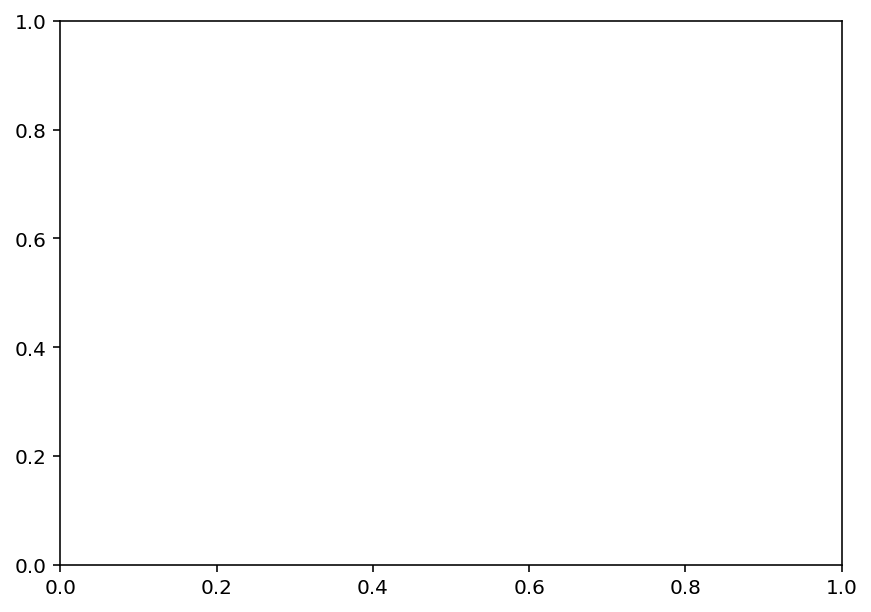

In [4]:
f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
ax.hist(boston.target - predictions, bins=50)
ax.set_title("Histogram of Residuals.")


#### Remark

*  If you're using IPython Notebook, use the \texttt{\%matplotlib inline} command to render the
plots inline. If you're using a regular interpreter, simply type \texttt{f.savefig('myfig.png')}
and the plot will be saved for you.

*  Plotting can be done via matplotlib. This isn't the focus of this workshop
but it's useful to plot your results, so we'll show some basic plotting.
The following is the histogram showing the output:

*  The error terms should be normal, with a mean of 0. The residuals
are the errors; therefore, this plot should be approximately normal. Visually, it's a good fit, though
a bit skewed. We can also look at the mean of the residuals, which should be very close to 0:





In [0]:
np.mean(boston.target - predictions)

# Clearly, we are very close.

### Normal Probability Plots (Q-Q plots)

* Another plot worth looking at is a Q-Q plot. 
* We'll use SciPy here because it has a built-in
probability plot:



In [0]:
<pre><code>
>>> from scipy.stats import probplot
>>> f = plt.figure(figsize=(7, 5))
>>> ax = f.add_subplot(111)
>>> probplot(boston.target - predictions, plot=ax)
</code></pre>

In [0]:


\begin{figure}
\centering
\includegraphics[width=0.7\linewidth]{images/SKL23-QQplot-2}
\end{figure}

Here, the skewed values we saw earlier are a bit clearer.
\subsection*{Other Metrics}






In [0]:
*  We can also look at some other metrics of the fit; mean squared error (MSE) and mean
absolute deviation (MAD) are two common metrics.
*  Let's define each one in Python and
use them. 
*  Later in the book, we'll look at how scikit-learn has built-in metrics to evaluate the regression models:



<pre><code>
>>> def MSE(target, predictions):
squared_deviation = np.power(target - predictions, 2)
return np.mean(squared_deviation)



In [0]:
>>> MSE(boston.target, predictions)
21.897779217687496
>>> def MAD(target, predictions):
absolute_deviation = np.abs(target - predictions)
return np.mean(absolute_deviation)
>>> MAD(boston.target, predictions)
3.2729446379969396
</code></pre>


In [0]:
### Theory  
The formula for MSE is very simple:
\[\mbox{MSE}=\frac{1}{n}\sum_{i=1}^n(\hat{Y_i} - Y_i)^2 \]


* It takes each predicted value's deviance from the actual value, squares it, and then averages
all the squared terms.
*   This is actually what we optimized to find the best set of coefficients for
linear regression. The Gauss-Markov theorem actually guarantees that the solution to linear
regression is the best in the sense that the coefficients have the smallest expected squared
error and are unbiased. 
*  In the Ridge Regression component to overcome linear regression's shortfalls
section, we'll look at what happens when we're okay with our coefficients being biased.






MAD is the expected error for the absolute errors:

    $$ \mbox{MAD}=\frac{1}{n}\sum_{i=1}^n |\hat{Y_i} - Y_i| $$

MAD isn't used when fitting the linear regression, but it's worth taking a look at. Why?
Think about what each one is doing and which errors are more important in each case.
For example, with MSE, the larger errors get penalized more than the other terms because
of the square term.

#### Further Remarks - Bootstrapping

Importantly the regression coefficients themselves are
random variables, and therefore, they have a distribution. Let's use bootstrapping to look
at the distribution of the coefficient for the crime rate. Bootstrapping is a very common
technique to get an understanding of the uncertainty of an estimate:


In [0]:

<pre><code>
>>> n_bootstraps = 1000
>>> len_boston = len(boston.target)
>>> subsample_size = np.int(0.5*len_boston)
>>>
>>> subsample = lambda: np.random.choice(np.arange(0, len_boston),size=subsample_size)
>>> coefs = np.ones(n_bootstraps) #pre-allocate the space for the coefs
>>>
>>> for i in range(n_bootstraps):
subsample_idx = subsample()
subsample_X = boston.data[subsample_idx]
subsample_y = boston.target[subsample_idx]
>>>
>>> lr.fit(subsample_X, subsample_y)
>>> coefs[i] = lr.coef_[0]
</code></pre>

%========================================================%
% % Working with Linear Models
% % 62
Now, we can look at the distribution of the coefficient:

<pre><code>
>>> import matplotlib.pyplot as plt
>>> f = plt.figure(figsize=(7, 5))
>>> ax = f.add_subplot(111)
>>> ax.hist(coefs, bins=50)
>>> ax.set_title("Histogram of the lr.coef_[0].")
</code></pre>

The following is the histogram that gets generated:
%========================================================%
% % Chapter 2
% % 63
We might also want to look at the bootstrapped confidence interval:

<pre><code>
>>> np.percentile(coefs, [2.5, 97.5])

array([-0.18566145, 0.03142513])
</code></pre>


*  
This is interesting; there's actually reason to believe that the crime rate might not have an
impact on the home prices. Notice how zero is within CI, which means that it may not play
a role.
*  It's also worth pointing out that bootstrapping can lead to a potentially better estimation for
coefficients because the bootstrapped mean with converge to the true mean is faster than
the coefficient found using regular estimation when in the limit.